In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt

%matplotlib inline

In [110]:
advertising_data =pd.read_csv('Advertising.csv',index_col=0)
advertising_data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [111]:
advertising_data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [112]:
print('Columns in Dataset:',advertising_data.columns)

print('Shape of dataset:',advertising_data.shape)

Columns in Dataset: Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')
Shape of dataset: (200, 4)


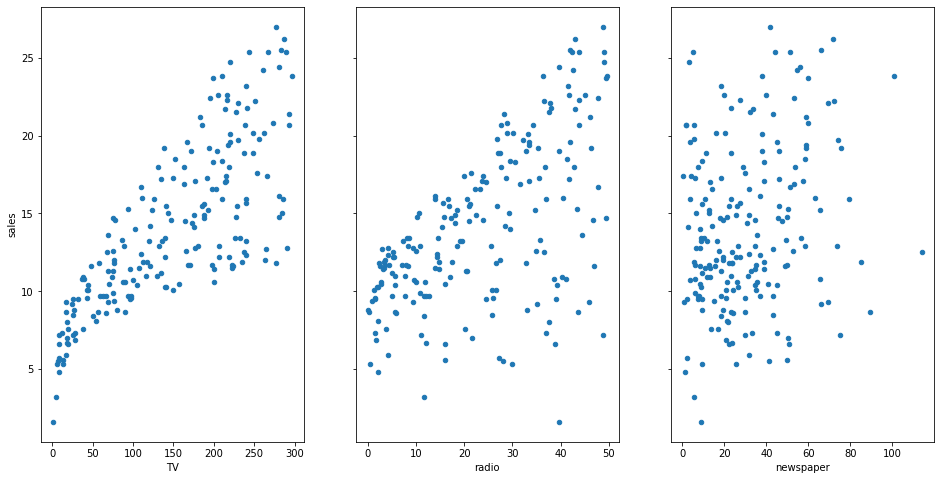

In [113]:
#Lets visualize the corealtion Independant Varaiables('TV', 'radio', 'newspaper') and dependant variable ('sales')

fig, axs = plt.subplots(1, 3, sharey=True)
advertising_data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16, 8))
advertising_data.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
advertising_data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2])

In [114]:
#We can say that TV and radio positively correlated with Sales while newspaper is Negatively correlated.


In [115]:
features = advertising_data.iloc[:,:-1].values
labels = advertising_data.iloc[:,-1].values

#Feature Standardization
from sklearn.preprocessing import StandardScaler
scFeatures = StandardScaler()
features = scFeatures.fit_transform(features)

In [116]:
#Import Train test split

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(features,labels,test_size=0.2,random_state=42)

In [117]:
#Let check the shape of training and testing sets
print('Training set:',xtrain.shape)
print('Testing Set:',xtest.shape)


Training set: (160, 3)
Testing Set: (40, 3)


In [118]:
#Build MLR Model in ML

from sklearn.linear_model import LinearRegression
modelR = LinearRegression()

#Fit the data into model

modelR.fit(xtrain,ytrain)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [119]:
#Check the quality (whether the model is generalized or not)
print('Training Score:',modelR.score(xtrain,ytrain))
print('Test Score:',modelR.score(xtest,ytest))

Training Score: 0.8957008271017817
Test Score: 0.899438024100912


In [120]:
#Model is generalized as our Test Score > Training Score 


In [121]:
#Convert into 2d arrays

#Create Feature and Label 2d array
#features = np.array([[features]])
labels = labels.reshape(-1,1)


In [122]:
# Now to proceed with ANN Deeplearning
# Rules For Regression for ANN -- DL
# =========================================
# 1. Data should be complete
# 2. Data should be strictly Numeric
# 3. Features must be represented in the form of 2d np array
# 4. Label must be represented in the form of 2d np array
# 5. Normalizing Features and Label is Mandatory

# Guidelines BY Prashant Nair for Normalization
# ===============================================
# 1. Features must be NORMALIZED (COMPULSORY !!!!) -- Always use StandardScaler or RobustScaler
# 2. LABELS must be NORMALIZED (COMPULSORY !!!!) ---- Always use MinMaxScaler with range (0,1)

In [123]:
#Label Normalization
from sklearn.preprocessing import MinMaxScaler
minMaxLabel = MinMaxScaler()
labels = minMaxLabel.fit_transform(labels)

In [106]:
#To get original value we need to perform inverse transform
minMaxLabel.inverse_transform(np.array([labels[0]]))

array([[22.1]])

In [125]:
features.ndim

2

In [126]:
#Train test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,
                                                labels,
                                                test_size=0.2,
                                                random_state=10)

#Model Building and Traing Process In ANN

# Guidelines by Prashant Nair for No of nOdes and No of Hidden layer for Classification
# =====================================================================================
# How Many Neurons to be initialized
# 1. Option1: First Hidden Layer --->No of Units ---> No of Features
#             No of Hidden Layers --> No of Features

# 2. Option2: First Hidden Layer --->No of Units ---> 3* No of Features
#             No of Hidden Layers --> No of Features

# 3. Option3: First Hidden Layer --->No of Units ---> 1/3 *No of Features
#             No of Hidden Layers --> No of Features

# If Success not received, then HUNT !!!!

# Guideline For Regression ANN
# ====================================================================================
## Start with 40 units in each hidden layer and inc the same till 100 units with step 5

In [133]:
#Architecting the Model

import tensorflow as tf

#Create A Sequential Model Object
model = tf.keras.models.Sequential()

#Step2: Create Dense Layer
#  units =  No of Neurons in Hidden Layer
#  activation = Which Activation Function to Apply
#  input_shape = (NoOfColsInFeatureArray,)

model.add(tf.keras.layers.Dense(units=40,activation='tanh',input_shape=(3,)))
model.add(tf.keras.layers.Dense(units=50,activation='tanh'))
model.add(tf.keras.layers.Dense(units=60,activation='tanh'))
model.add(tf.keras.layers.Dense(units=1,activation='linear'))

In [134]:
# Custom Metric Function ---> r2_keras_custom

def r2_keras_custom(y_true,y_pred):
  SS_res = tf.keras.backend.sum(tf.keras.backend.square(y_true-y_pred))
  SS_total = tf.keras.backend.sum(tf.keras.backend.square(y_true - tf.keras.backend.mean(y_true)))

  return 1-SS_res/(SS_total+tf.keras.backend.epsilon())




In [135]:
# Step2: Compile Model

model.compile(optimizer="sgd",loss='mean_squared_error',metrics=[r2_keras_custom])

In [136]:
#Step 3: Fit the Model with training data

model.fit(X_train,y_train,epochs=1000,validation_data=(X_test,y_test))

Epoch 1/1000
5/5 [==============================] - 0s 32ms/step - loss: 0.2637 - r2_keras_custom: -7.3429 - val_loss: 0.1670 - val_r2_keras_custom: -2.4020
Epoch 2/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.0865 - r2_keras_custom: -1.4039 - val_loss: 0.0633 - val_r2_keras_custom: -0.4910
Epoch 3/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.0340 - r2_keras_custom: 0.0668 - val_loss: 0.0308 - val_r2_keras_custom: 0.1039
Epoch 4/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.0164 - r2_keras_custom: 0.5366 - val_loss: 0.0206 - val_r2_keras_custom: 0.3245
Epoch 5/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.0102 - r2_keras_custom: 0.7210 - val_loss: 0.0173 - val_r2_keras_custom: 0.4052
Epoch 6/1000
5/5 [==============================] - 0s 5ms/step - loss: 0.0079 - r2_keras_custom: 0.7694 - val_loss: 0.0157 - val_r2_keras_custom: 0.4115
Epoch 7/1000
5/5 [==============================] - 0s 5ms/step - loss: